<a href="https://colab.research.google.com/github/KurArtem/JSON-java/blob/master/Neurals3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
link = "/content/drive/My Drive/Datasets/Networks"
drive.mount('/content/drive')
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from skimage import io
from sklearn.svm import SVC
import numpy as np
import random as rnd
import os
import zipfile
import math
from sklearn.model_selection import train_test_split
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

Mounted at /content/drive


In [ ]:
!python

In [ ]:
class SupportingVectors:
  def __init__(self):
    self.models = []
    self.kernels = ['linear', 'poly', 'sigmoid', 'rbf']
    self.x_train = []
    self.y_train = []
    self.x_test = []
    self.y_test = []
    self.__create_samples()
  def train(self):
    self.x_train = np.array(self.x_train).reshape(-1, 16 * 16 * 3)
    self.x_test = np.array(self.x_test).reshape(-1, 16 * 16 * 3)
    self.x_train = self.x_train / 255.0
    self.x_test = self.x_test / 255.0
    pca = PCA(n_components=2)
    self.x_train = pca.fit_transform(self.x_train)
    self.x_test = pca.fit_transform(self.x_test)
    for ker in self.kernels:
      model = SVC(kernel=ker)
      model.fit(self.x_train, self.y_train)
      self.models.append(model)
  def test(self):
    x1 = self.x_train[:, 0]
    x2 = self.x_train[:, 0]
    plt.scatter(x1, x2, s=50, c=self.y_train, alpha=0.5)
    for model_id in range(len(self.models)):
      hits = 0
      for i in range(len(self.x_test)):
        y_pred = self.models[model_id].predict(np.reshape(self.x_test[i], (-1, 2)))
        if (y_pred == self.y_test[i]):
          hits = hits + 1
      hitrate = hits / len(self.x_test)
      print("For ", self.kernels[model_id], " kernel test accuracy: ", hitrate)

  def __create_samples(self):  
    cats = []
    dogs = []
    classes = []
    for i in range(1, 11):
      cats.append(np.asarray(cv2.cvtColor(io.imread('/content/drive/My Drive/Datasets/Networks/TCats/' + str(i) + ".png"), cv2.COLOR_BGR2RGB)))
      dogs.append(np.asarray(cv2.cvtColor(io.imread('/content/drive/My Drive/Datasets/Networks/TDogs/' + str(i) + ".png"), cv2.COLOR_BGR2RGB)))

    cats_test = cats[:len(cats) // 5]
    cats_train = cats[len(cats) // 5:]
    dogs_test = dogs[:len(dogs) // 5]
    dogs_train = dogs[len(dogs) // 5:]

    print(np.shape(cats_train),np.shape(cats_test),np.shape(dogs_train),np.shape(dogs_test))

    self.x_train = [*cats_train, *dogs_train]
    self.x_test = [*cats_test, *dogs_test]
    self.y_train = [*([1] * int(len(cats) * 0.8)), *([0] * int(len(dogs) * 0.8))]
    self.y_test = [*([1] * int(len(cats) * 0.2)), *([0] * int(len(dogs) * 0.2))]

    print(np.shape(self.x_train), np.shape(self.x_test), np.shape(self.y_train), np.shape(self.y_test))

    self.__remake(self.x_train, self.y_train)
    self.__remake(self.x_test, self.y_test)

  def __remake(self, images, classes):
    fig, axs = plt.subplots(1, len(classes))
    fig.set_size_inches(100, 30)
    for i in range (int(len(images) / 2)):
      first_id = rnd.randint(0, len(images) - 1)
      second_id = rnd.randint(0, len(images) - 1)
      tmp_image = images[second_id]
      images[second_id] = images[first_id]
      images[first_id] = tmp_image

      tmp_class = classes[second_id]
      classes[second_id] = classes[first_id]
      classes[first_id] = tmp_class
    
    print('post-transform images ', np.shape(images))
    print('post-transform classes', np.shape(classes))
    print(type(images[0]))

    for i in range(len(classes)):
      axs[i].imshow(images[i])

    for i in range(len(classes)):
      axs[i].imshow(images[i])
    plt.show()

    print(classes)

(8, 16, 16, 3) (2, 16, 16, 3) (8, 16, 16, 3) (2, 16, 16, 3)
(16, 16, 16, 3) (4, 16, 16, 3) (16,) (4,)
post-transform images  (16, 16, 16, 3)
post-transform classes (16,)
<class 'numpy.ndarray'>


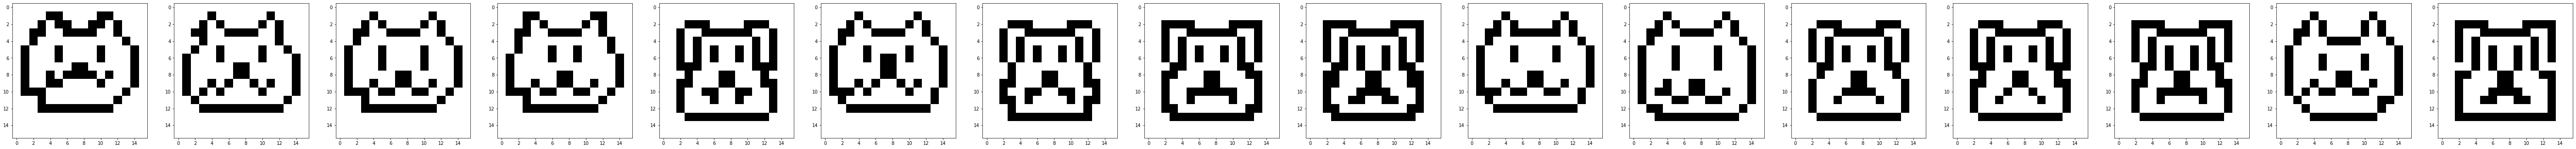

[1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]
post-transform images  (4, 16, 16, 3)
post-transform classes (4,)
<class 'numpy.ndarray'>


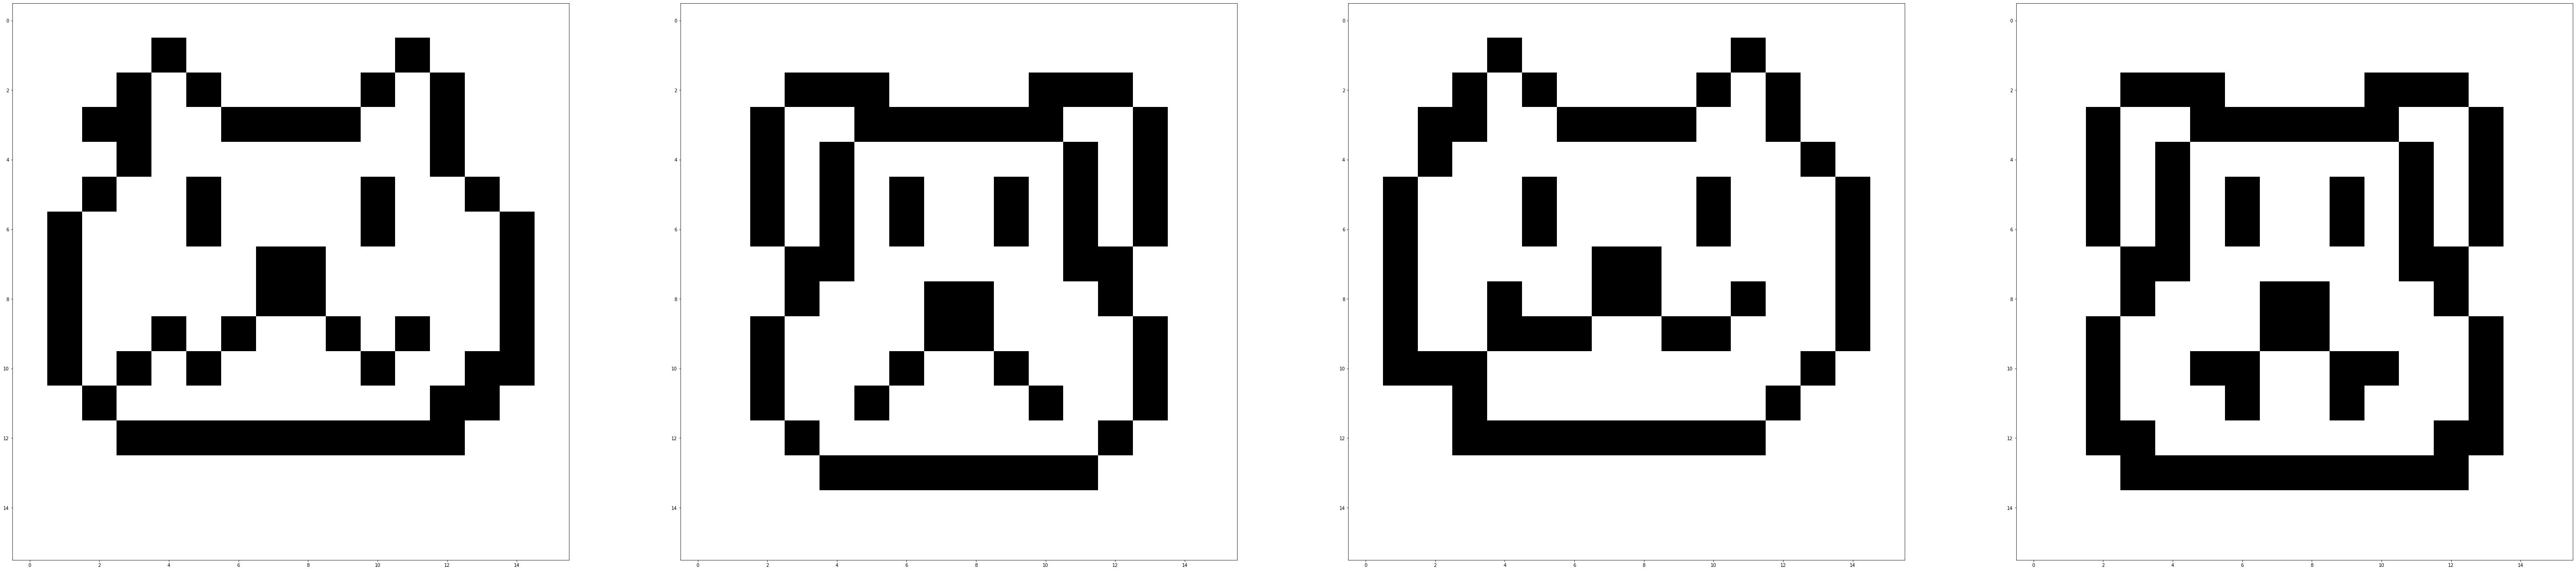

[1, 0, 1, 0]
For  linear  kernel test accuracy:  1.0
For  poly  kernel test accuracy:  1.0
For  sigmoid  kernel test accuracy:  1.0
For  rbf  kernel test accuracy:  1.0


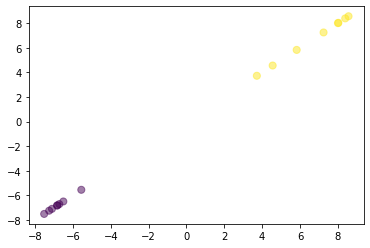

In [ ]:
sv = SupportingVectors()
sv.train()
sv.test()